https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/06-trees/homework.md

# Data
In this homework, we will use the California Housing Prices from Kaggle.

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

# Goal
The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value')

# Preparing the data

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2. But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Preparation:

- Fill missing values with zeros.
- Apply the log transform to median_house_value.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [27]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [ ]:

df = pd.read_csv("housing.csv")
df

In [16]:
df = df[df.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])]


In [18]:
df.isnull().sum()

#missign values
df = df.fillna(0)

In [30]:
# train test split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state = 1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [32]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_val = dv.fit_transform(val_dict)

array([[  68.  ,   13.  ,   37.93, ...,  196.  ,   76.  ,  493.  ],
       [ 268.  ,   10.  ,   34.  , ...,  705.  ,  339.  , 1526.  ],
       [ 122.  ,   46.  ,   38.85, ...,  410.  ,  131.  ,  645.  ],
       ...,
       [ 551.  ,   26.  ,   34.01, ..., 1720.  ,  598.  , 3042.  ],
       [ 239.  ,   35.  ,   34.03, ..., 1015.  ,  249.  , 1375.  ],
       [ 245.  ,   25.  ,   36.8 , ..., 1050.  ,  255.  , 1270.  ]])

# Question 1
Let's train a decision tree regressor to predict the median_house_value variable.

- Train a model with max_depth=1.

Which feature is used for splitting the data?

- ocean_proximity ✅
- total_rooms
- latitude
- population


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text


In [36]:
dt = DecisionTreeRegressor(max_depth=1)

dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=1)

In [40]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



# Question 2

Train a random forest model with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?

- 0.045
- 0.245 ✅
- 0.545
- 0.845

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [44]:
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [50]:
y_pred = rf.predict(X_val)
y_pred

array([12.24782585, 12.09793861, 11.60345211, ..., 11.69823549,
       11.27796894, 11.62937186])

In [54]:
rmse = np.sqrt(mean_squared_error(y_pred, y_val))
rmse

0.24504593887140147

# Question 3
Now let's experiment with the n_estimators parameter

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

- 10
- 25
- 50
- 160 ✅


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [59]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_pred, y_val))

    scores.append((n,rmse))


,0,1
0,10,0.245046
1,20,0.238253
2,30,0.236391
3,40,0.234532
4,50,0.234190
5,60,0.233748
6,70,0.233714
7,80,0.234050
8,90,0.234050
9,100,0.233907


In [61]:
df_scores = pd.DataFrame(scores, columns = ['n','rmse'])
df_scores

,n,rmse
0,10,0.245046
1,20,0.238253
2,30,0.236391
3,40,0.234532
4,50,0.234190
5,60,0.233748
6,70,0.233714
7,80,0.234050
8,90,0.234050
9,100,0.233907


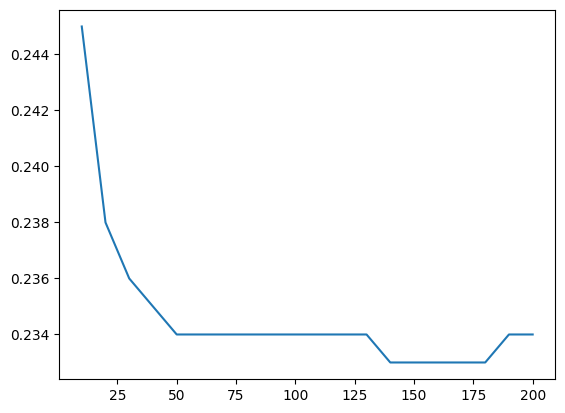

In [63]:
plt.plot(df_scores.n, df_scores.rmse.round(3));

# Question 4
Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
    - try different values of n_estimators from 10 till 200 (with step 10)
    - calculate the mean RMSE
- Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

- 10
- 15
- 20
- 25 ✅

In [66]:
scores =[]

for d in range(10, 26, 5):
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, warm_start=True)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_pred, y_val))

        scores.append((d, n, rmse))
scores

[(10, 10, 0.25099836126682956),
 (10, 20, 0.24755465462424622),
 (10, 30, 0.24641855320833259),
 (10, 40, 0.24521138142528215),
 (10, 50, 0.24563758540177053),
 (10, 60, 0.2455045631908559),
 (10, 70, 0.2454685861758491),
 (10, 80, 0.24569729570498683),
 (10, 90, 0.24558288659113958),
 (10, 100, 0.24549146390093446),
 (10, 110, 0.24536654780854447),
 (10, 120, 0.24512853113503635),
 (10, 130, 0.2448748953225214),
 (10, 140, 0.24466698205394322),
 (10, 150, 0.24463691070872223),
 (10, 160, 0.2445100196165071),
 (10, 170, 0.24444568363595476),
 (10, 180, 0.24453769564353034),
 (10, 190, 0.24474374460580178),
 (10, 200, 0.24478773242218257),
 (15, 10, 0.24538962820494697),
 (15, 20, 0.23958139463324554),
 (15, 30, 0.23774931571396846),
 (15, 40, 0.23605471559925292),
 (15, 50, 0.23598071403051687),
 (15, 60, 0.23567336621845508),
 (15, 70, 0.23555894941360356),
 (15, 80, 0.23580354618924207),
 (15, 90, 0.23561187600041467),
 (15, 100, 0.23540947011475716),
 (15, 110, 0.2353534355467643),


In [67]:
df_scores = pd.DataFrame(scores, columns = ['max_depth','n_estimators', 'rmse'])
df_scores

,max_depth,n_estimators,rmse
0,10,10,0.250998
1,10,20,0.247555
2,10,30,0.246419
3,10,40,0.245211
4,10,50,0.245638
...,...,...,...
75,25,160,0.233484
76,25,170,0.233449
77,25,180,0.233698
78,25,190,0.233960


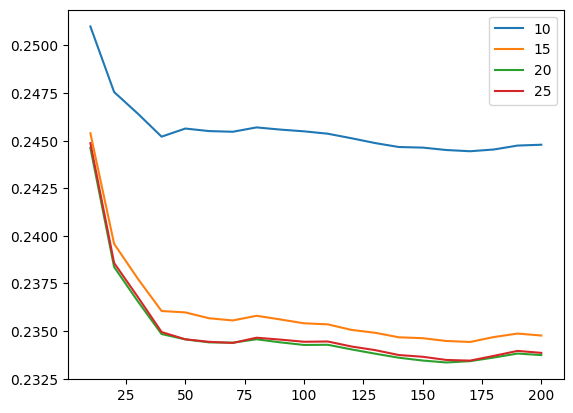

In [70]:
for d in [10,15,20,25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label =d)

plt.legend()

# Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

- Train the model with these parameters:
    - n_estimators=10,
    - max_depth=20,
    - random_state=1,
    - n_jobs=-1 (optional)

Get the feature importance information from this model

What's the most important feature (among these 4)?

- total_rooms
- median_income ✅
- total_bedrooms
- longitude

In [71]:
rf = RandomForestRegressor(n_estimators=10, max_depth = 20, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, random_state=1)

In [74]:
df_importances = pd.DataFrame()
df_importances['features'] = dv.feature_names_
df_importances['importance'] = rf.feature_importances_
df_importances

,features,importance
0,households,0.014765
1,housing_median_age,0.030076
2,latitude,0.102595
3,longitude,0.086034
4,median_income,0.335540
5,ocean_proximity=<1H OCEAN,0.218820
6,ocean_proximity=INLAND,0.147460
7,population,0.027421
8,total_bedrooms,0.016048
9,total_rooms,0.021241


In [75]:
df_importances.sort_values(by='importance')

,features,importance
0,households,0.014765
8,total_bedrooms,0.016048
9,total_rooms,0.021241
7,population,0.027421
1,housing_median_age,0.030076
3,longitude,0.086034
2,latitude,0.102595
6,ocean_proximity=INLAND,0.147460
5,ocean_proximity=<1H OCEAN,0.218820
4,median_income,0.335540


# Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:

In [76]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

- 0.3 ✅
- 0.1
Both give equal value

In [80]:
import xgboost as xgb

In [82]:
features = dv.feature_names_
features = [f.replace('<', 'less ') for f in features]
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=less 1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [86]:
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [87]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [89]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [90]:
%%capture output_03

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [92]:
scores['eta=0.3'] = parse_xgb_output(output_03)

In [94]:
%%capture output_01

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [95]:
scores['eta=0.1'] = parse_xgb_output(output_01)

In [96]:
scores

{'eta=0.3':     num_iter  train_auc  val_auc
 0          0    0.44350  0.44250
 1          5    0.25338  0.27463
 2         10    0.21444  0.25179
 3         15    0.19858  0.24522
 4         20    0.18524  0.23978
 5         25    0.17757  0.23830
 6         30    0.16888  0.23570
 7         35    0.16113  0.23416
 8         40    0.15542  0.23318
 9         45    0.14941  0.23190
 10        50    0.14536  0.23225
 11        55    0.14150  0.23197
 12        60    0.13719  0.23139
 13        65    0.13259  0.23158
 14        70    0.12943  0.23068
 15        75    0.12555  0.23039
 16        80    0.12192  0.22886
 17        85    0.11854  0.22888
 18        90    0.11496  0.22861
 19        95    0.11211  0.22908
 20        99    0.10989  0.22862,
 'eta=0.1':     num_iter  train_auc  val_auc
 0          0    0.52449  0.52045
 1          5    0.37822  0.38151
 2         10    0.30326  0.31427
 3         15    0.26538  0.28380
 4         20    0.24512  0.26882
 5         25    0.23026 

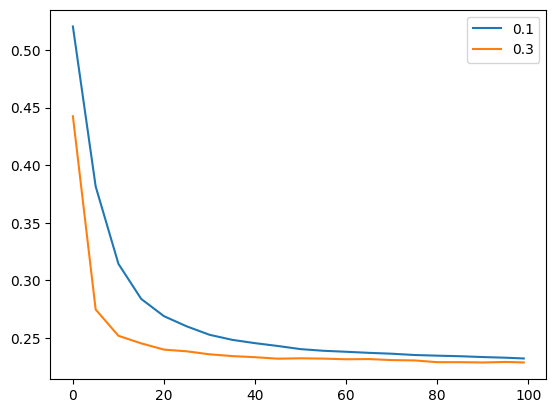

In [97]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,
        label='0.3')
plt.legend()
plt.show()